<a href="https://colab.research.google.com/github/giedriusblazys/SDA_DS_class/blob/main/Prediction_of_happiness_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Prediction of happiness score

**Data Source** https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – logged GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity and perceptions of corruption - in each country (file - *world-happiness-report-2021.csv*).

**Logged GDP per capita** - GDP per capita is a measure of a country’s economic output that accounts for its number of people.

**Social support** - Social support means having friends and other people, including family, turning to in times of need or crisis to give you a broader focus and positive self-image. Social support enhances the quality of life and provides a buffer against adverse life events.

**Healthy life expectancy** - Healthy Life Expectancy is the average number of years that a newborn can expect to live in “full health” — in other words, not hampered by disabling illnesses or injuries.

**Freedom to make life choices** - Freedom of choice describes an individual’s opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.

**Generosity** - is defined as the residual of regressing the national average of responses to the question, “Have you donated money to a charity in past months?” on GDP capita.

**Perceptions of corruption** - The Corruption Perceptions Index (CPI) is an index published annually by Transparency International since 1995, which ranks countries “by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys.”

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# improve how pandas numbers are displayed
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sarunas856/happiness/main/world-happiness-report-2021.csv', usecols=[0,1,2,6,7,8,9,10,11])

In [ ]:
df = df.rename(columns={'Ladder score': 'Happiness score',
                        'Logged GDP per capita': 'GDP',
                        'Social support': 'Social_support',
                        'Healthy life expectancy': 'Healthy_life_expectancy',
                        'Freedom to make life choices': 'Freedom_to_make_life_choices',
                        'Perceptions of corruption': 'Perceptions_of_corruption'})

In [ ]:
df.head ()

,Country name,Regional indicator,Happiness score,GDP,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Happiness score               149 non-null    float64
 3   GDP                           149 non-null    float64
 4   Social_support                149 non-null    float64
 5   Healthy_life_expectancy       149 non-null    float64
 6   Freedom_to_make_life_choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions_of_corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


In [ ]:
df.describe()

,Happiness score,GDP,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,5.533,9.432,0.815,64.993,0.792,-0.015,0.727
std,1.074,1.159,0.115,6.762,0.113,0.151,0.179
min,2.523,6.635,0.463,48.478,0.382,-0.288,0.082
25%,4.852,8.541,0.750,59.802,0.718,-0.126,0.667
50%,5.534,9.569,0.832,66.603,0.804,-0.036,0.781
75%,6.255,10.421,0.905,69.600,0.877,0.079,0.845
max,7.842,11.647,0.983,76.953,0.970,0.542,0.939


In [ ]:
num_cols = ['Happiness score', 'GDP', 'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption']
numeric_features = df[num_cols]

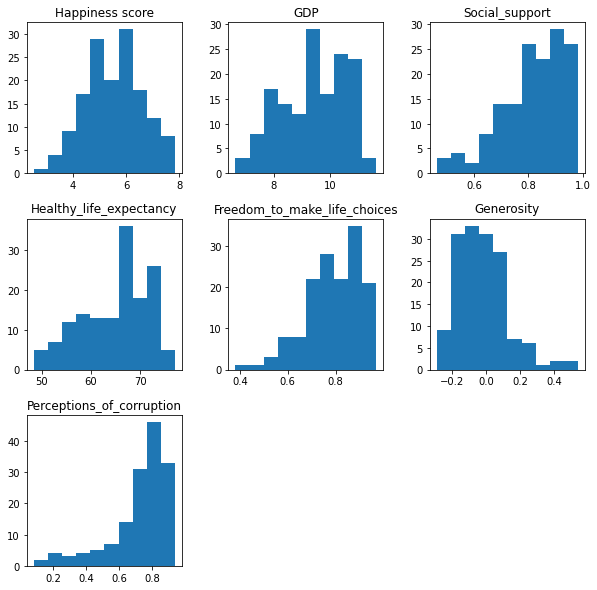

In [ ]:
histograms = numeric_features.hist(grid=False, figsize=(10, 10))

In [ ]:
def corr_plot(mat, title='My Title', color='cividis'):
    plt.subplots(figsize=(14, 11))
    plt.title(title,fontsize=22)

    sns.heatmap(mat,linewidths=0.2,vmax=0.7,square=True,cmap=color, 
                linecolor='w',annot=True,annot_kws={'size':9},cbar_kws={'shrink': .5})

In [ ]:
corr_matrix = df[num_cols].corr()

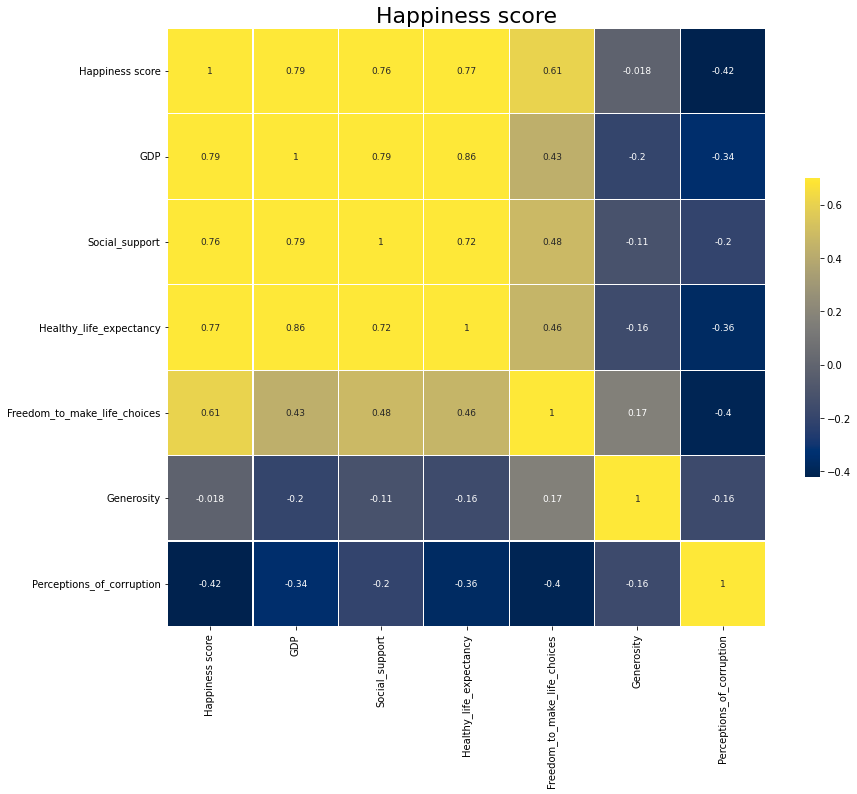

In [ ]:
# plotting corr_matrix Happiness score
corr_plot(corr_matrix, "Happiness score")

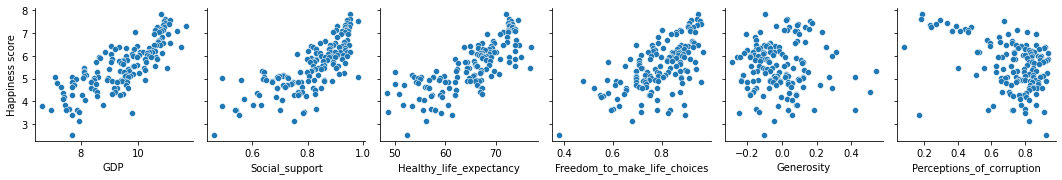

In [ ]:
#correlation by each 
sns.pairplot(data=df, x_vars=['GDP','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption'], y_vars=["Happiness score"])

In [ ]:
df.head(1)

,Country name,Regional indicator,Happiness score,GDP,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186


In [ ]:
df.groupby('Regional indicator',sort=False)['Happiness score'].mean()

Regional indicator
Western Europe                       6.915
North America and ANZ                7.128
Middle East and North Africa         5.220
Latin America and Caribbean          5.908
Central and Eastern Europe           5.985
East Asia                            5.810
Southeast Asia                       5.408
Commonwealth of Independent States   5.467
Sub-Saharan Africa                   4.494
South Asia                           4.442
Name: Happiness score, dtype: float64

In [ ]:
df['Regional indicator'].value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

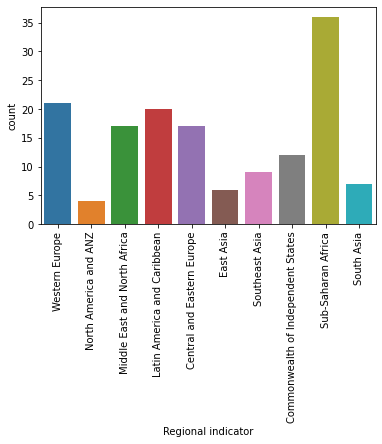

In [ ]:
# count Region indicator
sns.countplot(df['Regional indicator'])
plt.xticks(rotation = 90)
plt.show()

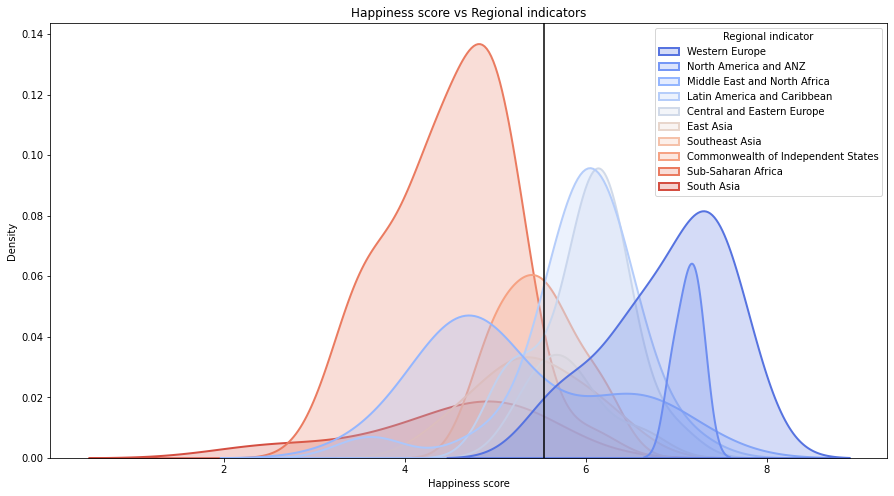

In [ ]:
plt.figure(figsize = (15, 8));
sns.kdeplot(df["Happiness score"], hue = df["Regional indicator"], fill = True, linewidth = 2, palette = "coolwarm");
plt.axvline(df["Happiness score"].mean(), c = "black"); # Mean value of Ladder score
plt.title("Happiness score vs Regional indicators");

1. Global North / Global South
Sub-Saharan Africa - Global South
Western Europe - Global North
Latin America and Caribbean - Global South
Middle East and North Africa - Global South
Central and Eastern Europe - Global North

Commonwealth of Independent States - Global North
Southeast Asia - Global South
South Asia - Global North

East Asia - Global South
North America and ANZ - Global North

In [ ]:
def label_country (row):
   if row['Regional indicator'] == 'Western Europe' :
      return 'Global North'
   if row['Regional indicator'] == 'Central and Eastern Europe' :
      return 'Global North'
   if row['Regional indicator'] == 'Commonwealth of Independent States' :
      return 'Global North'
   if row['Regional indicator'] == 'North America and ANZ' :
      return 'Global North'
   if row['Regional indicator'] == 'Sub-Saharan Africa' :
      return 'Global South'
   if row['Regional indicator'] == 'Latin America and Caribbean' :
      return 'Global South'
   if row['Regional indicator'] == 'East Asia' :
      return 'Global North'
   if row['Regional indicator'] == 'Middle East and North Africa' :
      return 'Global South'
   if row['Regional indicator'] == 'South Asia' :
      return 'Global South'
   if row['Regional indicator'] == 'Southeast Asia' :
      return 'Global South'
   return 'Other'  

In [ ]:
df.apply (lambda row: label_country(row), axis=1)

0      Global North
1      Global North
2      Global North
3      Global North
4      Global North
           ...     
144    Global South
145    Global South
146    Global South
147    Global South
148    Global South
Length: 149, dtype: object

In [ ]:
df['Global North/East'] = df.apply (lambda row: label_country(row), axis=1)

In [ ]:
df.head(1)

,Country name,Regional indicator,Happiness score,GDP,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Global North/East
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,Global North


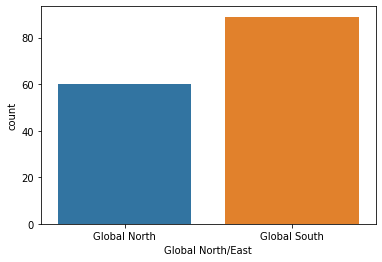

In [ ]:
sns.countplot(df['Global North/East'])
plt.xticks()
plt.show()

##Top 10 happiest countries are Global North

In [ ]:
df.head(10)

,Country name,Regional indicator,Happiness score,GDP,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Global North/East
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,Global North
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,Global North
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,Global North
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,Global North
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,Global North
5,Norway,Western Europe,7.392,11.053,0.954,73.300,0.960,0.093,0.270,Global North
6,Sweden,Western Europe,7.363,10.867,0.934,72.700,0.945,0.086,0.237,Global North
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.600,0.907,-0.034,0.386,Global North
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.400,0.929,0.134,0.242,Global North
9,Austria,Western Europe,7.268,10.906,0.934,73.300,0.908,0.042,0.481,Global North


##Top 10 unhappiest 

In [ ]:
df.tail(10)

,Country name,Regional indicator,Happiness score,GDP,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Global North/East
139,Burundi,Sub-Saharan Africa,3.775,6.635,0.490,53.400,0.626,-0.024,0.607,Global South
140,Yemen,Middle East and North Africa,3.658,7.578,0.832,57.122,0.602,-0.147,0.800,Global South
141,Tanzania,Sub-Saharan Africa,3.623,7.876,0.702,57.999,0.833,0.183,0.577,Global South
142,Haiti,Latin America and Caribbean,3.615,7.477,0.540,55.700,0.593,0.422,0.721,Global South
143,Malawi,Sub-Saharan Africa,3.600,6.958,0.537,57.948,0.780,0.038,0.729,Global South
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,Global South
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,Global South
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167,Global South
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,Global South
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,Global South


In [ ]:
df.groupby('Global North/East')['Happiness score'].mean()

Global North/East
Global North   6.266
Global South   5.039
Name: Happiness score, dtype: float64

In [ ]:
df.groupby('Global North/East')['GDP'].mean()

Global North/East
Global North   10.290
Global South    8.854
Name: GDP, dtype: float64

**Iškelta hipotezė, kad piečiau esančiose valstybėse laimės indeksas turėtų būti didesnis, dėl kultūrinių skirtumų, šviesos, šilumos ir pan. Tačiau, pagal pateiktus duomenis, ši hipotezė buvo paneigta, kadangi nagrinėjamos ypatybės šių aplinkybių nevertina, o remiasi kitomis ypatybėmis, kurios šios hipotezės negali atspindėti.**

## Eastern Europe

In [ ]:
east = df.loc[[0, 37, 39, 43, 50, 74, 75, 109]]
display(east)

,Country name,Regional indicator,Happiness score,GDP,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Global North/East
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,Global North
37,Lithuania,Central and Eastern Europe,6.255,10.499,0.935,67.906,0.773,-0.203,0.826,Global North
39,Estonia,Central and Eastern Europe,6.189,10.481,0.941,68.800,0.909,-0.106,0.527,Global North
43,Poland,Central and Eastern Europe,6.166,10.382,0.898,69.702,0.841,-0.165,0.735,Global North
50,Latvia,Central and Eastern Europe,6.032,10.315,0.927,67.100,0.715,-0.162,0.800,Global North
74,Belarus,Commonwealth of Independent States,5.534,9.853,0.910,66.253,0.650,-0.180,0.627,Global North
75,Russia,Commonwealth of Independent States,5.477,10.189,0.903,64.703,0.718,-0.111,0.845,Global North
109,Ukraine,Commonwealth of Independent States,4.875,9.436,0.888,64.902,0.724,-0.011,0.924,Global North


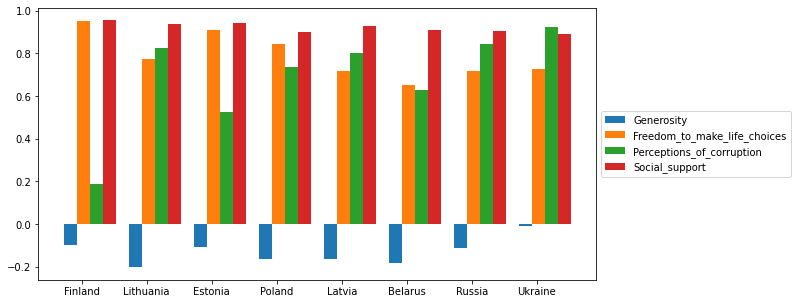

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
x = np.arange(len(east['Country name']))

ax.bar(x, east['Generosity'], label="Generosity", width=0.2)
ax.bar(x+0.2, east['Freedom_to_make_life_choices'], label="Freedom_to_make_life_choices", width=0.2)
ax.bar(x+0.4, east['Perceptions_of_corruption'], label="Perceptions_of_corruption", width=0.2)
ax.bar(x+0.6, east['Social_support'], label="Social_support", width=0.2)

# ax.xaxis.set_tick_params(rotation=90)
xticks = east['Country name']
ax.set_xticklabels(east['Country name'])
ax.set_xticks(x+0.35/2)


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

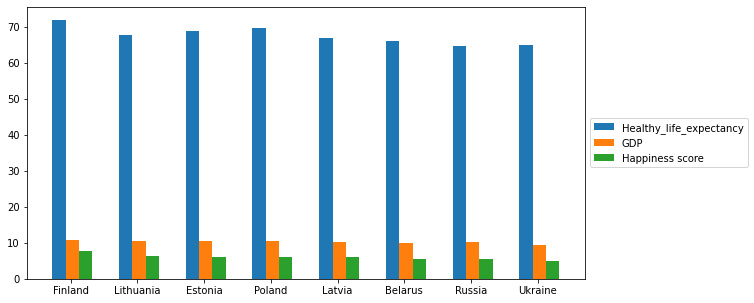

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 

ax.bar(x, east['Healthy_life_expectancy'], label="Healthy_life_expectancy", width=0.2)
ax.bar(x+0.2, east['GDP'], label="GDP", width=0.2)
ax.bar(x+0.4, east['Happiness score'], label="Happiness score", width=0.2)


# xticks = fin_ltu['Country name']
ax.set_xticklabels(east['Country name'])
ax.set_xticks(x+0.35/2)


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

**Lyginant Lietuvos, Suomijos ir kitų kaimyninių šalių laimės indeksą didelis 
skirtumas matomas dosnumo ir korupcijos srityse, kiti rodikliai atrodo panašūs. Tačiau tai, kad Baltarusijos korupcijos lygis yra mažesnis nei Estijos, kyla didelės abejonės dėl duomenų atitikimo tikrovei.**




### Linear regression

In [ ]:
y = df['Happiness score']
x = df[['GDP','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices']]

In [ ]:
import statsmodels.api as sm 
x_train = sm.add_constant(x)

In [ ]:
model = sm.OLS(y, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness score   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     104.7
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.27e-41
Time:                        14:19:00   Log-Likelihood:                -119.97
No. Observations:                 149   AIC:                             249.9
Df Residuals:                     144   BIC:                             265.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.1116      0.457     -6.808      0.000      -4.015      -2.208
GDP                              0.2918      0.086      3.381      0.001       0.121       0.462
Social_support                   2.1659      0.662      3.270      0.001       0.857       3.475
Healthy_life_expectancy          0.0331      0.013      2.463      0.015       0.007       0.060
Freedom_to_make_life_choices     2.4982      0.465      5.378      0.000       1.580       3.416
==============================================================================
Omnibus:                        9.504   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.477
Skew:                          -0.557   Prob(JB):                      0.00875
Kurtosis:                       3.535   Cond. No.                         998.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def rmse(y_test, y_pred):
    """root mean squared error"""
    return round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

def mae(y_test, y_pred):
    return round(mean_absolute_error(y_test, y_pred), 3)

def mape(y_test, y_pred):
    return round(mean_absolute_percentage_error(y_test, y_pred), 3)

def wmape(y_test, y_pred):
    wmape = sum(np.abs(y_test-y_pred)) / sum(np.abs(y_test))
    return round(wmape, 4)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size = 0.7, random_state=412)

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f'MAPE: {mape(y_test, y_pred)}')
print(f'WMAPE: {wmape(y_test, y_pred)}')


print(f'MAE: {mae(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')

MAPE: 0.085
WMAPE: 0.0792
MAE: 0.45
RMSE: 0.554


In [ ]:
y_test_mean = np.mean(y_test)
idx_high_p = y_test > y_test_mean 

In [ ]:
print('Model performance for happier countries')
print(f'RMSE - linear model:     {rmse(y_test[idx_high_p], y_pred[idx_high_p])}')
print(f'MAPE - linear model:     {mape(y_test[idx_high_p], y_pred[idx_high_p])}')

Model performance for happier countries
RMSE - linear model:     0.379
MAPE - linear model:     0.05


In [ ]:
print('Model performance for less happier countries')
print(f'RMSE - linear model:     {rmse(y_test[~idx_high_p], y_pred[~idx_high_p])}')
print(f'MAPE - linear model:     {mape(y_test[~idx_high_p], y_pred[~idx_high_p])}')

Model performance for less happier countries
RMSE - linear model:     0.681
MAPE - linear model:     0.118


### Polynomial regression

In [ ]:
my_df = df.copy()
my_df['sq_1'] = my_df['GDP']
for i in range(2, 4):
  my_df['sq_'+str(i)] = my_df['sq_1']*my_df['sq_'+str(i-1)]

In [ ]:
my_df.filter(like = 'sq_').head()

,sq_1,sq_2,sq_3
0,10.775,116.101,1250.984
1,10.933,119.530,1306.827
2,11.117,123.588,1373.924
3,10.878,118.331,1287.203
4,10.932,119.509,1306.468


In [ ]:
x = my_df
y = my_df['Happiness score']
X_tr,X_te,y_tr,y_te=train_test_split(x,y,train_size = 0.7, random_state=412)
X_train,X_test,y_train,y_test=X_tr,X_te,y_tr,y_te

In [ ]:
def fit_model(X_train,X_test,y_train,y_test):
    lr.fit(X_train,y_train)
    y_pred_train = lr.predict(X_train)
    y_pred = lr.predict(X_test)

    rmse_train = round(np.sqrt(mean_squared_error(y_train, y_pred_train)),3)
    rmse_test = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
    mae_train = round(mean_absolute_error(y_train, y_pred_train), 3)
    mae_test = round(mean_absolute_error(y_test, y_pred), 3)
    mape_train = round(mean_absolute_percentage_error(y_train, y_pred_train), 3)
    mape_test = round(mean_absolute_percentage_error(y_test, y_pred), 3)

    return y_pred_train,y_pred,rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test

def plot_fit(X_train,X_test,y_train,y_test, y_pred_train):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].scatter(X_train['sq_1'], y_train, color='gray', alpha=0.3)
    axes[0].scatter(X_train['sq_1'], y_pred_train, color='red', alpha=0.3)
    axes[1].scatter(X_test['sq_1'], y_test, color='gray', alpha=0.3)
    axes[1].scatter(X_test['sq_1'], y_pred, color='red', alpha=0.3)
    axes[0].title.set_text('Train Sample')
    axes[1].title.set_text('Test Sample')
    fig.tight_layout()
    plt.show()

def plot_fit_var(X_train,X_test,y_train,y_test, y_pred_train, var):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].scatter(X_train[var], y_train, color='gray', alpha=0.3)
    axes[0].scatter(X_train[var], y_pred_train, color='red', alpha=0.3)
    axes[1].scatter(X_test[var], y_test, color='gray', alpha=0.3)
    axes[1].scatter(X_test[var], y_pred, color='red', alpha=0.3)
    axes[0].title.set_text('Train Sample')
    axes[1].title.set_text('Test Sample')
    fig.tight_layout()
    plt.show()

In [ ]:
eval_df = pd.DataFrame(
    {'Model': [], 
     'Details':[],                   
     'RMSE (train)':[],
     'RMSE (test)':[],
     'MAE (train)':[],
     'MAE (test)':[],
     'MAPE (train)':[],
     'MAPE (test)':[],
    })

### Polynomial regression evalution

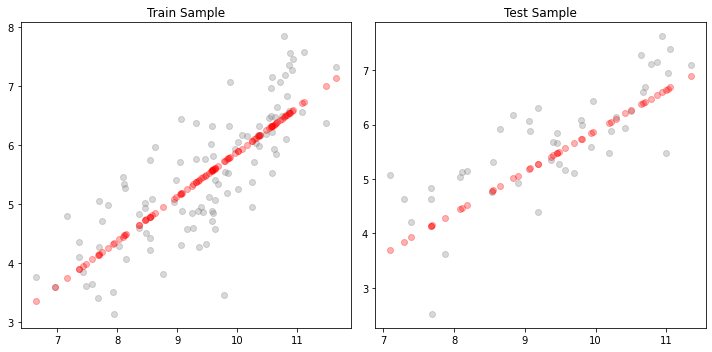

In [ ]:
X_train,X_test=X_tr.filter(regex='sq_[1]$'),X_te.filter(regex='sq_[1]$')
y_pred_train,y_pred,rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[1] = ['Simple linear regression', '1st degree polynomial (GDP)', rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test]
plot_fit(X_train,X_test,y_train,y_test, y_pred_train)

In [ ]:
X1 = my_df['GDP']
x1_train = sm.add_constant(X1)
model = sm.OLS(y, x1_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness score   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     243.7
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           5.23e-33
Time:                        14:19:01   Log-Likelihood:                -148.73
No. Observations:                 149   AIC:                             301.5
Df Residuals:                     147   BIC:                             307.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3719      0.446     -3.079      0.002      -2.253      -0.491
GDP            0.7320      0.047     15.610      0.000       0.639       0.825
==============================================================================
Omnibus:                        3.978   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.644
Skew:                          -0.379   Prob(JB):                        0.162
Kurtosis:                       3.109   Cond. No.                         79.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

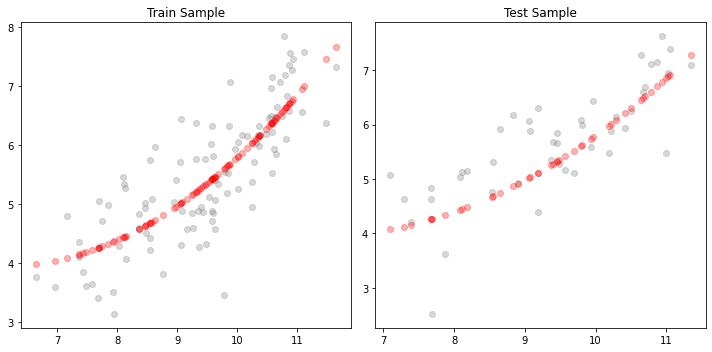

In [ ]:
X_train,X_test=X_tr.filter(regex='sq_[12]$'),X_te.filter(regex='sq_[12]$') #Regex 
y_pred_train,y_pred,rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[2] = ['Simple linear regression', '2nd degree polynomial (GDP)', rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test]
plot_fit(X_train,X_test,y_train,y_test, y_pred_train)

In [ ]:
X2 = my_df['GDP']**2
x2_train = sm.add_constant(X2)
model = sm.OLS(y, x2_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness score   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     255.2
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           6.13e-34
Time:                        14:19:02   Log-Likelihood:                -146.56
No. Observations:                 149   AIC:                             297.1
Df Residuals:                     147   BIC:                             303.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9290      0.232      8.321      0.000       1.471       2.387
GDP            0.0399      0.002     15.975      0.000       0.035       0.045
==============================================================================
Omnibus:                        3.987   Durbin-Watson:                   1.304
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.588
Skew:                          -0.371   Prob(JB):                        0.166
Kurtosis:                       3.161   Cond. No.                         403.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

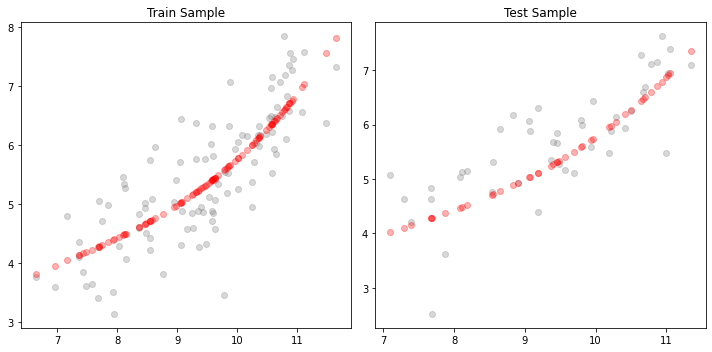

In [ ]:
X_train,X_test=X_tr.filter(regex='sq_[123]$'),X_te.filter(regex='sq_[123]$') #Regex 
y_pred_train,y_pred,rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[3] = ['Simple linear regression', '3rd degree polynomial (GDP)', rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test]
plot_fit(X_train,X_test,y_train,y_test, y_pred_train)

In [ ]:
X3 = my_df['GDP']**3
x3_train = sm.add_constant(X3)
model = sm.OLS(y, x3_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness score   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     261.6
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.89e-34
Time:                        14:19:03   Log-Likelihood:                -145.38
No. Observations:                 149   AIC:                             294.8
Df Residuals:                     147   BIC:                             300.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0374      0.163     18.623      0.000       2.715       3.360
GDP            0.0028      0.000     16.176      0.000       0.002       0.003
==============================================================================
Omnibus:                        3.933   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                3.485
Skew:                          -0.360   Prob(JB):                        0.175
Kurtosis:                       3.207   Cond. No.                     2.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Working on features engineering

In [ ]:
cols = ['Social_support','Healthy_life_expectancy','Generosity']
freedom_cols = ['Freedom_to_make_life_choices' + x for x in cols]

X_tr[freedom_cols] = X_tr.groupby('Freedom_to_make_life_choices')[cols].transform('mean')
X_te[freedom_cols] = X_te.groupby('Freedom_to_make_life_choices')[cols].transform('mean')

In [ ]:
features = ['GDP'] + freedom_cols
X_train,X_test = X_tr[features],X_te[features]
y_pred_train,y_pred,rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[4] = ['Simple linear regression', '1st degree (GDP) + freedom level features', rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test]

In [ ]:
X_tr['GDP_x_freedom'] = X_tr.GDP*X_tr.Freedom_to_make_life_choices
X_te['GDP_x_freedom'] = X_te.GDP*X_te.Freedom_to_make_life_choices
X_tr['Perceptions_of_corruption_x_freedom'] = X_tr.Perceptions_of_corruption*X_tr.Freedom_to_make_life_choices
X_te['Perceptions_of_corruption_x_freedom'] = X_te.Perceptions_of_corruption*X_te.Freedom_to_make_life_choices

In [ ]:
features = ['GDP'] + freedom_cols + ['GDP_x_freedom']
X_train,X_test = X_tr[features],X_te[features]
y_pred_train,y_pred,rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[5] = ['Simple linear regression', '1st degree (GDP) + freedom level features + GDP_x_freedom', rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test]

In [ ]:
features = ['GDP'] + freedom_cols + ['GDP_x_freedom','Perceptions_of_corruption_x_freedom']
X_train,X_test = X_tr[features],X_te[features]
y_pred_train,y_pred,rmse_train,rmse_test, mae_train,mae_test,mape_train,mape_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[6] = ['Simple linear regression', '1st degree (GDP) + freedom level features + GDP_x_freedom + Perceptions_of_corruption_x_freedom', rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test]

In [ ]:
pd.set_option('display.max_colwidth', 100)

In [ ]:
eval_df

,Model,Details,RMSE (train),RMSE (test),MAE (train),MAE (test),MAPE (train),MAPE (test)
1,Simple linear regression,1st degree polynomial (GDP),0.659,0.664,0.532,0.548,0.104,0.106
2,Simple linear regression,2nd degree polynomial (GDP),0.639,0.663,0.514,0.526,0.100,0.102
3,Simple linear regression,3rd degree polynomial (GDP),0.638,0.662,0.512,0.523,0.100,0.101
4,Simple linear regression,1st degree (GDP) + freedom level features,0.580,0.641,0.455,0.517,0.091,0.098
5,Simple linear regression,1st degree (GDP) + freedom level features + GDP_x_freedom,0.554,0.558,0.431,0.458,0.086,0.087
6,Simple linear regression,1st degree (GDP) + freedom level features + GDP_x_freedom + Perceptions_of_corruption_x_freedom,0.550,0.551,0.429,0.440,0.086,0.085


In [ ]:
cols = ['Social_support','Healthy_life_expectancy','Generosity']
freedom_cols = ['Freedom_to_make_life_choices' + x for x in cols]
df[freedom_cols] = df.groupby('Freedom_to_make_life_choices')[cols].transform('mean')

df['GDP_x_freedom'] = df.GDP * df.Freedom_to_make_life_choices
df['Perceptions_of_corruption_x_freedom'] =df.Perceptions_of_corruption*df.Freedom_to_make_life_choices

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 15 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country name                                         149 non-null    object 
 1   Regional indicator                                   149 non-null    object 
 2   Happiness score                                      149 non-null    float64
 3   GDP                                                  149 non-null    float64
 4   Social_support                                       149 non-null    float64
 5   Healthy_life_expectancy                              149 non-null    float64
 6   Freedom_to_make_life_choices                         149 non-null    float64
 7   Generosity                                           149 non-null    float64
 8   Perceptions_of_corruption                            149 non-null    f

In [ ]:
features = [
    'GDP', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Freedom_to_make_life_choicesSocial_support', 'Freedom_to_make_life_choicesHealthy_life_expectancy',
    'Freedom_to_make_life_choicesGenerosity', 'GDP_x_freedom', 'Perceptions_of_corruption_x_freedom'
    ]
x= df[features]
y = df['Happiness score']

In [ ]:
### model characteristics
x_train = sm.add_constant(x)
model = sm.OLS(y, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness score   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     51.41
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           6.47e-40
Time:                        14:19:03   Log-Likelihood:                -112.39
No. Observations:                 149   AIC:                             244.8
Df Residuals:                     139   BIC:                             274.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   3.8037      2.631      1.446      0.150      -1.397       9.005
GDP                                                    -0.4938      0.318     -1.554      0.123      -1.122       0.135
Social_support                                          3.4048      1.613      2.111      0.037       0.217       6.593
Healthy_life_expectancy                                 0.0413      0.025      1.624      0.107      -0.009       0.092
Freedom_to_make_life_choices                           -6.1996      3.515     -1.764      0.080     -13.149       0.750
Freedom_to_make_life_choicesSocial_support             -0.9493      1.682     -0.564      0.573      -4.276       2.377
Freedom_to_make_life_choicesHealthy_life_expectancy    -0.0042      0.026     -0.162      0.871      -0.055       0.047
Freedom_to_make_life_choicesGenerosity                  0.3766      0.345      1.092      0.277      -0.305       1.058
GDP_x_freedom                                           0.9403      0.374      2.514      0.013       0.201       1.680
Perceptions_of_corruption_x_freedom                    -0.3277      0.352     -0.931      0.353      -1.024       0.368
==============================================================================
Omnibus:                       10.573   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.806
Skew:                          -0.585   Prob(JB):                      0.00450
Kurtosis:                       3.610   Cond. No.                     9.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df['GDP * Freedom'] = df['GDP'] * df['Freedom_to_make_life_choices']
df['Corruption * Freedom'] = df['Perceptions_of_corruption'] * df['Freedom_to_make_life_choices']
df['Freedom_to_make_life_choices'] = df['Freedom_to_make_life_choicesSocial_support'] + df['Freedom_to_make_life_choicesHealthy_life_expectancy'] + df['Freedom_to_make_life_choicesGenerosity']

In [ ]:
test_predictions = reg.predict(X_test)

In [ ]:
test_predictions_table = pd.DataFrame({
    'GDP': X_test.iloc[:, 0],  
    'Freedom_to_make_life_choices': X_test.iloc[:, 1],
    'GDP * Freedom': X_test.iloc[:, 2],
    'Corruption * Freedom': X_test.iloc[:, 3],
    'Test Happiness': y_test,
    'Predicted Happiness': test_predictions,
    'Prediction Diff': (y_test - test_predictions)
    
})

In [ ]:
test_predictions_table

,GDP,Freedom_to_make_life_choices,GDP * Freedom,Corruption * Freedom,Test Happiness,Predicted Happiness,Prediction Diff
119,7.288,0.720,56.498,0.050,4.625,4.099,0.526
45,10.284,0.832,67.355,-0.219,6.140,5.715,0.425
112,7.678,0.691,56.977,-0.028,4.834,4.107,0.727
12,10.873,0.903,72.500,0.011,7.155,6.777,0.378
93,9.693,0.805,65.474,0.038,5.101,5.465,-0.364
76,11.000,0.836,76.820,0.067,5.477,6.536,-1.059
148,7.695,0.463,52.493,-0.102,2.523,2.923,-0.400
13,10.776,0.926,73.800,0.089,7.103,7.010,0.093
36,9.186,0.877,67.500,-0.137,6.309,5.564,0.745
58,8.648,0.812,67.300,0.081,5.919,5.372,0.547


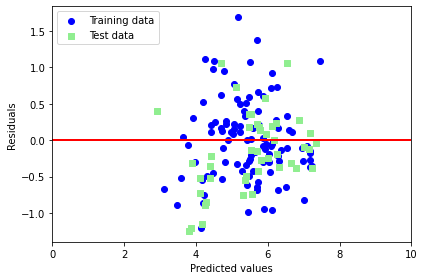

In [ ]:
plt.scatter(y_pred_train,  y_pred_train - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_pred,  y_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=10, lw=2, color='red')
plt.xlim([0, 10])
plt.tight_layout()

## KFold checked, metrics < eval_df 

### Decision tree regression

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import graphviz

In [ ]:
features = ['GDP','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption']
x= df[features]
y = df['Happiness score']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size = 0.7, random_state=412)
dtr = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_split=5)
tree_model = dtr.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

In [ ]:
print()
print('******* Decision Tree, max_depth=8 *******')
print()
print(f'Validation MAPE: {mape(y_test, y_pred)}')
print(f'Validation WMAPE: {wmape(y_test, y_pred)}')
print(f'Validation MAE: {mae(y_test, y_pred)}')
print(f'Validation RMSE: {rmse(y_test, y_pred)}')


******* Decision Tree, max_depth=8 *******

Validation MAPE: 0.115
Validation WMAPE: 0.1063
Validation MAE: 0.604
Validation RMSE: 0.755


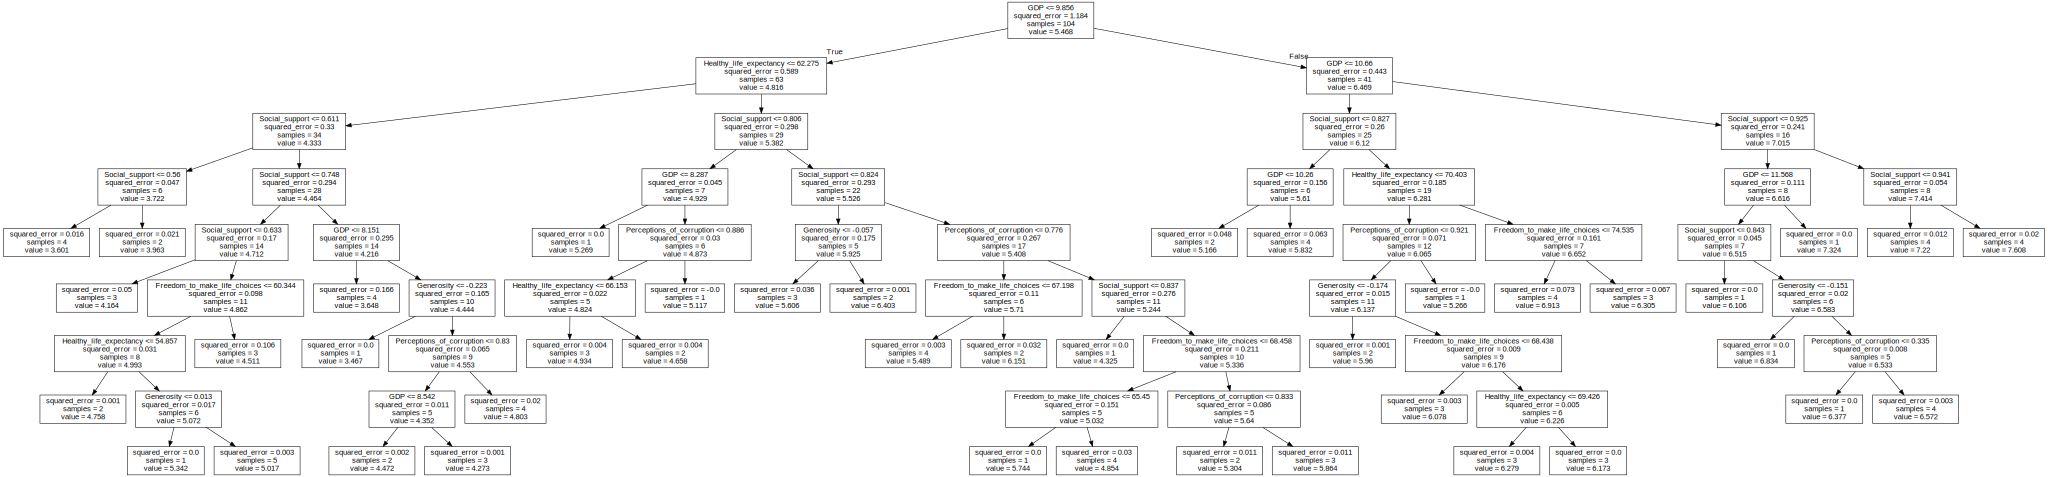

In [ ]:
tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=features)
graphviz.Source(tree_graph)

In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(tree_model, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2920 ± 0.1810,GDP
0.2488 ± 0.2427,Social_support
0.2162 ± 0.0844,Healthy_life_expectancy
0.0052 ± 0.0254,Generosity
-0.0250 ± 0.0950,Perceptions_of_corruption
-0.0454 ± 0.0452,Freedom_to_make_life_choices


In [ ]:
!pip install pdpbox

In [ ]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

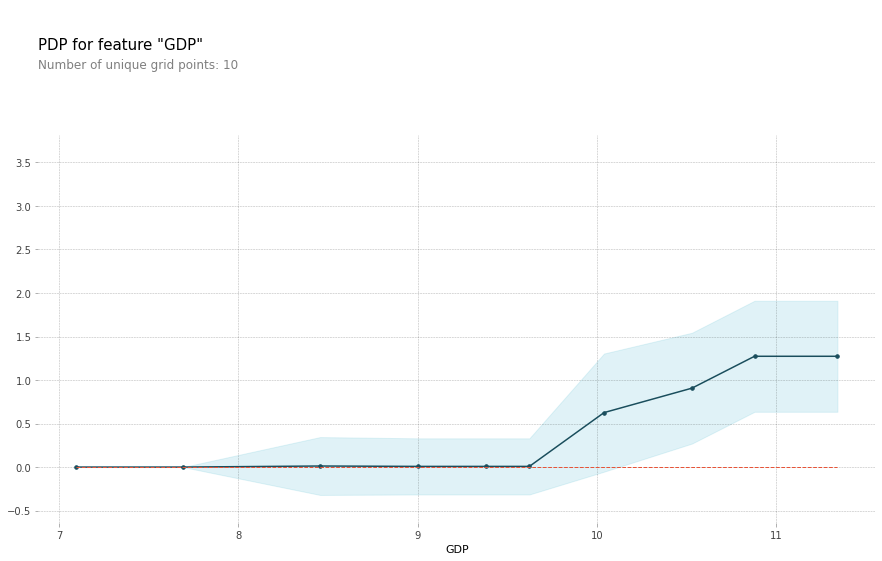

In [ ]:
feature_to_plot = 'GDP'

pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=X_test, model_features=features, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

In [ ]:
!pip install shap

## Investigate model prediction for a concrete case

In [ ]:
import shap

row_to_show = 25

data_for_prediction = X_test.iloc[row_to_show] 
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
my_y_pred = tree_model.predict(data_for_prediction_array)[0]


print(f'Data: {data_for_prediction}')
print()
print('Decision Tree Model')
print()
print(f'Actual happiness index: {y.iloc[row_to_show]:,.2f}')
print(f'Predicted happiness index: {my_y_pred:,.2f}')

Data: GDP                            10.499
Social_support                  0.935
Healthy_life_expectancy        67.906
Freedom_to_make_life_choices   68.638
Generosity                     -0.203
Perceptions_of_corruption       0.826
Name: 37, dtype: float64

Decision Tree Model

Actual happiness index: 6.49
Predicted happiness index: 5.96


In [ ]:
shap.initjs()

explainer = shap.TreeExplainer(tree_model)

shap_values = explainer.shap_values(data_for_prediction)

shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

##Investigate model features across all dataset

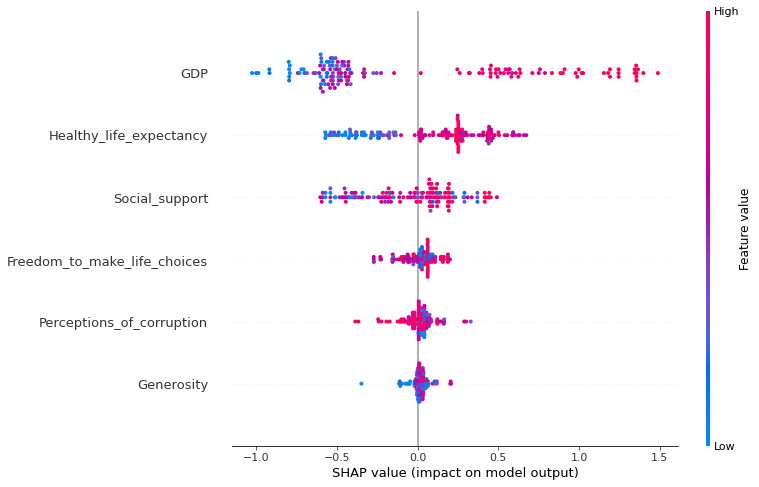

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(tree_model)

# Calculate shap_values for all data points.
shap_values = explainer.shap_values(x)

# Make plot
shap.summary_plot(shap_values, x, plot_size=[10,8])

#### **įžvalgos**

*   **GDP ir sveikata proporcingai daro didžiausią įtaką laimės indeksui.**
*   **Pasirinkimo laisvė daro daugiau teigiamą įtaką laimės indeksui nei neigiamą, t.y. mažesnė pasirinkimo laisvė silpniau turi įtakos laimės indeksui.**
*   **Dosnumas silpniausiai daro įtaką laimės indeksui.**




**Išvada**

**Duomenyse trūksta daugiau ypatybių, kurios leistų tiksliau įvertinti šalių laimės indeksą (pavyzdžiui: savižudybių skaičius, sergamumas depresija, tikėjimas, meditacijos praktikos taikymas ir pan.)**

### Random forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=10, min_samples_split=10).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print()
print('******* Random Forest *******')
print()
print(f'Validation MAPE: {mape(y_test, y_pred)}')
print(f'Validation WMAPE: {wmape(y_test, y_pred)}')
print(f'Validation MAE: {mae(y_test, y_pred)}')
print(f'Validation RMSE: {rmse(y_test, y_pred)}')


******* Random Forest *******

Validation MAPE: 0.088
Validation WMAPE: 0.0777
Validation MAE: 0.442
Validation RMSE: 0.556


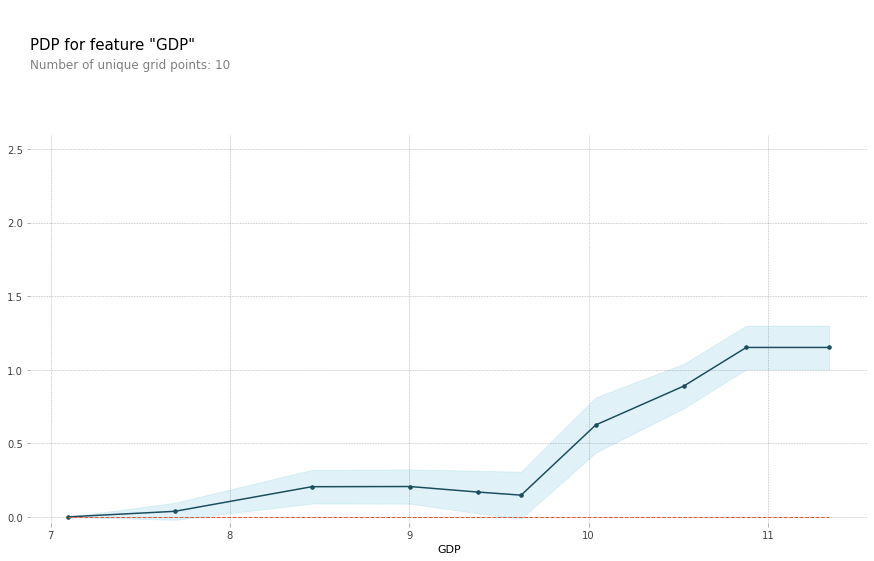

In [ ]:
feature_to_plot = 'GDP'

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=X_test, model_features=features, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

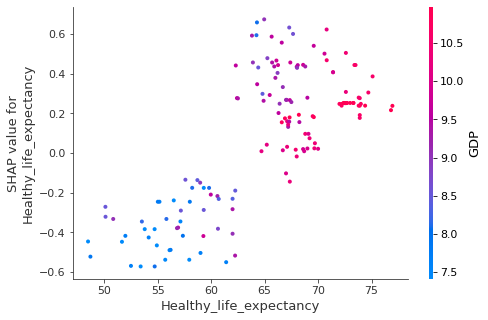

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(tree_model)

# Calculate shap_values for all data points.
shap_values = explainer.shap_values(x)

# make plot.
shap.dependence_plot('Healthy_life_expectancy', shap_values, x, interaction_index="GDP")

In [ ]:
data_for_prediction = X_test.iloc[row_to_show] 
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
my_y_pred = rf_model.predict(data_for_prediction_array)[0]


print()
print('******* Random Forest *******')
print()
print(f'Actual happiness index: {y.iloc[row_to_show]:,.2f}')
print(f'Predicted happiness index: {my_y_pred:,.2f}')


******* Random Forest *******

Actual happiness index: 6.49
Predicted happiness index: 6.26


In [ ]:
shap.initjs()

# Create object that can calculate shap values
explainer = shap.Explainer(rf_model, X_train, feature_names=features)

shap_values = explainer.shap_values(data_for_prediction)

shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

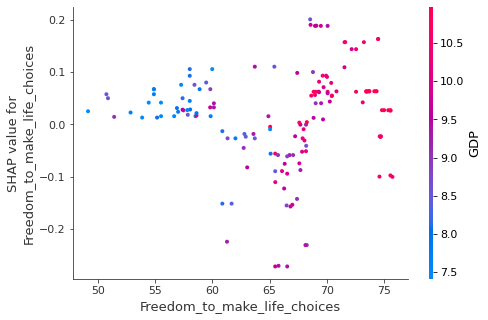

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(tree_model)

# Calculate shap_values for all data points.
shap_values = explainer.shap_values(x)

# make plot.
shap.dependence_plot('Freedom_to_make_life_choices', shap_values, x, interaction_index="GDP")